In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


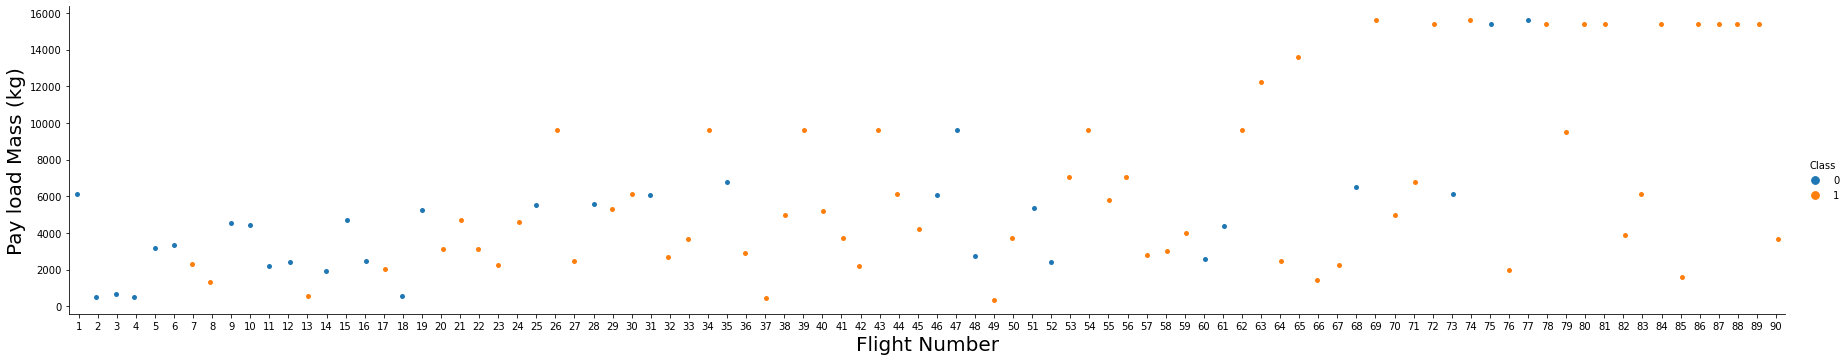

In [4]:
sns.catplot(x="FlightNumber",y="PayloadMass",hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [9]:
df.groupby(['LaunchSite'])['Class'].value_counts(normalize=True)

LaunchSite    Class
CCAFS SLC 40  1        0.600000
              0        0.400000
KSC LC 39A    1        0.772727
              0        0.227273
VAFB SLC 4E   1        0.769231
              0        0.230769
Name: Class, dtype: float64

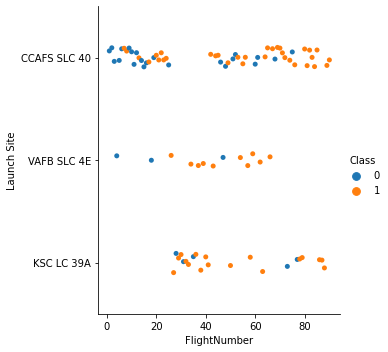

In [11]:
sns.catplot(x="FlightNumber",y="LaunchSite",hue="Class",data=df)
plt.xlabel("FlightNumber")
plt.ylabel("Launch Site")
plt.show()

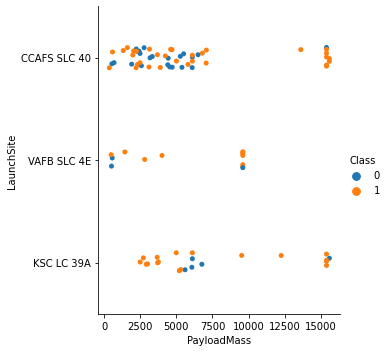

In [12]:
sns.catplot(x="PayloadMass",y="LaunchSite",hue='Class',data=df)
plt.show()

In [31]:
df['orbit_sr'] = df.groupby(['Orbit'])['Class'].transform('mean')
df['orbit_sr']

0     0.714286
1     0.714286
2     0.619048
3     0.666667
4     0.518519
        ...   
85    0.857143
86    0.857143
87    0.857143
88    0.857143
89    0.666667
Name: orbit_sr, Length: 90, dtype: float64

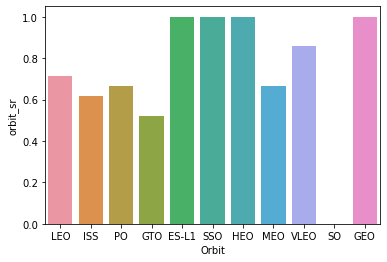

In [33]:
sns.barplot(x='Orbit',y='orbit_sr',data=df)
plt.show()

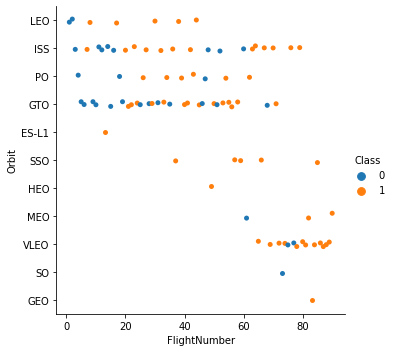

In [34]:
sns.catplot(x="FlightNumber",y="Orbit",hue="Class",data=df)
plt.show()

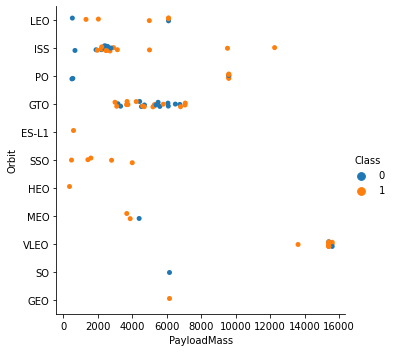

In [36]:
sns.catplot(x="PayloadMass",y="Orbit",hue="Class",data=df)
plt.show()

In [40]:
year= []
    
    

In [41]:
for i in df['Date']:
        year.append(i.split("-")[0])

In [58]:
df['year'] = pd.DataFrame(year)

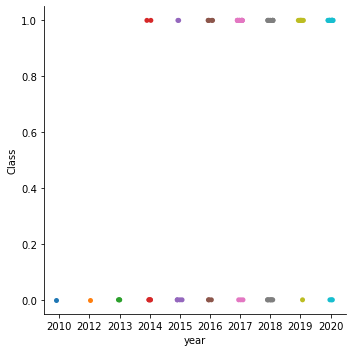

In [67]:
sns.catplot(x="year",y="Class",data=df)
plt.show()

In [68]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [72]:
features_one_hot = pd.get_dummies(features,columns=['Orbit','LaunchSite','LandingPad','Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
features_one_hot= features_one_hot.astype('float64')

In [77]:
features_one_hot.shape

(90, 80)

In [78]:
features_one_hot.to_csv('dataset_part_3.csv',index=False)